In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


In [ ]:
dataset = MNIST(root = './data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='./data/', train=False)

In [5]:
dataset[0]
%matplotlib inline

Label: 5


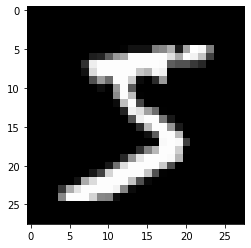

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


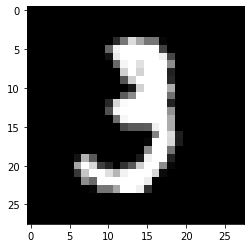

In [7]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [8]:
import torchvision.transforms as transforms # we need to transform the pictures into tensors!
#transforms contain many predefined functions to transform pictures into tensors, we can use ToTensor in this case

dataset = MNIST(root="./data/", train=True, transform=transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# we have now convereted the images into a 1x28x28 tensor. The first dimension is the color channels, the seoncd and third represent the number of pixels in the image. 

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
#0 represents black, 1 represents white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


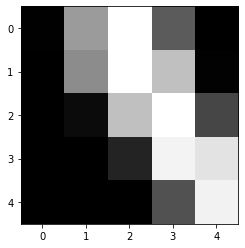

In [11]:
# Plot the image by passing in the 28x28 matrix

plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [12]:
#split training into validation

from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)

val_loader = DataLoader(val_ds, batch_size)

In [14]:
import torch.nn as nn

input_size = 28*28 # we must flatten the images into an array equal to num of pixels
num_classes = 10 # 10 different digits 

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape)

torch.Size([10, 784])


In [16]:
model.weight

Parameter containing:
tensor([[-0.0274, -0.0216, -0.0277,  ..., -0.0220,  0.0193, -0.0323],
        [ 0.0105, -0.0202,  0.0275,  ...,  0.0095,  0.0222, -0.0248],
        [-0.0144,  0.0151, -0.0234,  ..., -0.0024, -0.0154,  0.0349],
        ...,
        [ 0.0087, -0.0250, -0.0029,  ...,  0.0137, -0.0073,  0.0270],
        [-0.0191,  0.0185, -0.0297,  ..., -0.0253, -0.0036,  0.0102],
        [-0.0068,  0.0152, -0.0164,  ..., -0.0357,  0.0230, -0.0256]],
       requires_grad=True)

In [17]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0062,  0.0211, -0.0174,  0.0092, -0.0138,  0.0174, -0.0133,  0.0242,
        -0.0327, -0.0171], requires_grad=True)

In [18]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([0, 4, 3, 8, 6, 2, 6, 5, 8, 6, 9, 2, 2, 7, 1, 2, 0, 3, 3, 5, 8, 1, 5, 6,
        2, 8, 4, 0, 4, 5, 1, 8, 3, 0, 1, 8, 8, 9, 7, 1, 8, 6, 9, 8, 1, 1, 8, 2,
        6, 9, 9, 1, 5, 6, 4, 7, 3, 4, 5, 3, 8, 9, 9, 6, 9, 8, 2, 4, 0, 9, 8, 0,
        8, 5, 6, 3, 5, 1, 9, 9, 5, 3, 8, 9, 2, 4, 8, 1, 4, 2, 6, 7, 5, 7, 1, 1,
        9, 8, 3, 8, 5, 9, 3, 2, 9, 8, 9, 6, 0, 1, 6, 9, 8, 9, 1, 8, 5, 1, 2, 1,
        5, 9, 4, 9, 5, 3, 0, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [19]:
# this doesn't work because we need to flatten the images!

images.shape

torch.Size([128, 1, 28, 28])

In [20]:
images.reshape(128, 784).shape # now we have flattened the data!

torch.Size([128, 784])

In [21]:
# we will extend the nn.Module class to define a custom model: 
import torch.nn as nn
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        ## instansate model with hyper parameters 
        self.linear= nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        # define foward method 
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()


In [22]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0104,  0.0085,  0.0336,  ..., -0.0142, -0.0016,  0.0118],
         [-0.0107,  0.0289,  0.0327,  ..., -0.0325,  0.0330,  0.0278],
         [-0.0064,  0.0340, -0.0338,  ..., -0.0112,  0.0089, -0.0153],
         ...,
         [ 0.0106, -0.0137,  0.0152,  ...,  0.0339, -0.0256,  0.0102],
         [ 0.0249,  0.0283, -0.0150,  ...,  0.0017,  0.0246, -0.0241],
         [-0.0012, -0.0188, -0.0256,  ...,  0.0138, -0.0051, -0.0046]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0197,  0.0261, -0.0118, -0.0021, -0.0022,  0.0248,  0.0271,  0.0335,
          0.0071,  0.0069], requires_grad=True)]

In [24]:
for images, labels in train_loader: 
    print(images.shape)
    outputs = model(images)
    break
print('outputs.shape: ', outputs.shape)
print('sample outputs:\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
sample outputs:
 tensor([[ 0.2986,  0.1363,  0.0884, -0.0139, -0.3479, -0.0295,  0.0354,  0.1572,
         -0.3162,  0.1041],
        [-0.0042,  0.1084,  0.0640,  0.0232, -0.0827,  0.1217, -0.0564,  0.1648,
          0.0958, -0.0246]])


In [25]:
# we can use the softmax function to convert output rows into probabilities 
probs = F.softmax(outputs, dim=1)
print("Sample probs: \n", probs[:2].data)

Sample probs: 
 tensor([[0.1309, 0.1113, 0.1061, 0.0958, 0.0686, 0.0943, 0.1006, 0.1137, 0.0708,
         0.1078],
        [0.0953, 0.1066, 0.1020, 0.0979, 0.0881, 0.1081, 0.0904, 0.1128, 0.1053,
         0.0934]])


In [26]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 7, 2, 3, 7, 1, 0, 1, 7, 3, 1, 1, 7, 7, 1, 7, 7, 1, 7, 8, 5, 6, 3, 0,
        1, 2, 6, 9, 9, 5, 2, 1, 7, 2, 1, 0, 7, 9, 7, 1, 2, 7, 4, 6, 7, 3, 1, 2,
        2, 7, 7, 2, 7, 7, 7, 7, 7, 1, 1, 1, 7, 3, 7, 7, 2, 1, 7, 5, 0, 2, 7, 9,
        3, 1, 9, 2, 5, 3, 9, 6, 9, 7, 2, 2, 3, 0, 1, 2, 7, 6, 0, 0, 3, 1, 7, 3,
        0, 7, 1, 2, 7, 1, 2, 6, 7, 3, 7, 2, 3, 2, 7, 3, 3, 7, 0, 8, 2, 7, 7, 6,
        7, 7, 2, 2, 7, 7, 2, 0])
tensor([0.1309, 0.1128, 0.1153, 0.1167, 0.1292, 0.1268, 0.1166, 0.1368, 0.1170,
        0.1232, 0.1324, 0.1302, 0.1263, 0.1350, 0.1410, 0.1289, 0.1214, 0.1362,
        0.1203, 0.1148, 0.1282, 0.1221, 0.1425, 0.1165, 0.1290, 0.1370, 0.1293,
        0.1348, 0.1193, 0.1334, 0.1435, 0.1161, 0.1208, 0.1184, 0.1436, 0.1208,
        0.1299, 0.1252, 0.1427, 0.1124, 0.1210, 0.1195, 0.1129, 0.1267, 0.1243,
        0.1165, 0.1437, 0.1272, 0.1144, 0.1311, 0.1233, 0.1303, 0.1191, 0.1297,
        0.1270, 0.1496, 0.1182, 0.1394, 0.1157, 0.1283, 0.1227, 0.1162, 0.1260,
       

In [27]:
labels

tensor([7, 1, 1, 1, 3, 2, 7, 0, 8, 2, 7, 7, 8, 4, 2, 6, 1, 9, 4, 0, 0, 3, 2, 7,
        8, 8, 5, 3, 7, 2, 2, 0, 6, 1, 0, 5, 2, 3, 6, 7, 5, 8, 0, 5, 2, 1, 8, 7,
        1, 4, 4, 2, 6, 4, 9, 8, 4, 8, 9, 0, 9, 1, 6, 9, 2, 3, 9, 0, 8, 2, 5, 7,
        2, 3, 3, 1, 5, 1, 5, 9, 3, 2, 2, 5, 2, 8, 2, 1, 8, 3, 7, 7, 1, 9, 9, 1,
        4, 2, 3, 7, 9, 6, 4, 0, 9, 1, 6, 3, 1, 1, 9, 1, 1, 4, 2, 4, 1, 5, 4, 5,
        9, 4, 2, 1, 6, 6, 1, 6])

In [28]:
outputs[:2]

tensor([[ 0.2986,  0.1363,  0.0884, -0.0139, -0.3479, -0.0295,  0.0354,  0.1572,
         -0.3162,  0.1041],
        [-0.0042,  0.1084,  0.0640,  0.0232, -0.0827,  0.1217, -0.0564,  0.1648,
          0.0958, -0.0246]], grad_fn=<SliceBackward>)

In [29]:
torch.sum(preds==labels) ## element wise comparision 

tensor(7)

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [31]:
accuracy(outputs, labels)

tensor(0.0547)

In [32]:
probs

tensor([[0.1309, 0.1113, 0.1061,  ..., 0.1137, 0.0708, 0.1078],
        [0.0953, 0.1066, 0.1020,  ..., 0.1128, 0.1053, 0.0934],
        [0.0966, 0.0937, 0.1153,  ..., 0.0909, 0.1020, 0.1032],
        ...,
        [0.0939, 0.1039, 0.1157,  ..., 0.1265, 0.0886, 0.0682],
        [0.0956, 0.0891, 0.1282,  ..., 0.1010, 0.0952, 0.1036],
        [0.1304, 0.0953, 0.1119,  ..., 0.0964, 0.1145, 0.0818]],
       grad_fn=<SoftmaxBackward>)

In [33]:
# note: accuracy cannot be used as a loss function as it non-differentiable 
# it also doesn't take into account the probabilities predicted by the model, so it can't provide sufficent feedback for incremental improvements 

# common loss function for classification is cross-entropy: 
# For each output row, pick the predicted probability for the correct label. Then take the logarithm of the predicted probability and multiply by -1. Log close to 1 is a small negative number and close to 0 is a larger negative number. We simply take the average of the cross entropy across all output rows to calculate the overall loss for that batch of data. 

In [34]:
loss_fn = F.cross_entropy

In [35]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3125, grad_fn=<NllLossBackward>)


In [36]:
# e^-2.23 is about 0.1, which can be interpretted as the average predited probablity of the correct label, so we are basically guessing at chance right now

    for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [37]:
def fit(epochs, lr, model, train_loader, val_loader, opt_function=torch.optim.SGD):
    optimizer = opt_function(model.parameters(), lr)
    history=[] #for recording epoch-wise results

    for epoch in range(epochs):
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history


In [38]:
l1 = [1,2,3,4,5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [40]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [41]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3286077976226807, 'val_acc': 0.09553006291389465}

In [42]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9591, val_acc: 0.6062
Epoch [1], val_loss: 1.6901, val_acc: 0.7210
Epoch [2], val_loss: 1.4886, val_acc: 0.7573
Epoch [3], val_loss: 1.3361, val_acc: 0.7774
Epoch [4], val_loss: 1.2187, val_acc: 0.7915


In [43]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1264, val_acc: 0.8013
Epoch [1], val_loss: 1.0522, val_acc: 0.8101
Epoch [2], val_loss: 0.9915, val_acc: 0.8162
Epoch [3], val_loss: 0.9408, val_acc: 0.8204
Epoch [4], val_loss: 0.8980, val_acc: 0.8261
